
---


## 📓 `eda_airbnb.ipynb`

# 🏠 EDA on Airbnb Dataset  

This notebook presents an **Exploratory Data Analysis (EDA)** on Airbnb listings dataset.  
The goal is to uncover insights about pricing, locations, availability, and host activities.  

---

## 🔑 Key Objectives
1. Understand dataset structure and basic statistics.  
2. Explore geographical distribution of listings.  
3. Analyze pricing patterns.  
4. Study host behavior and availability trends.  

In [9]:
# Basic Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configure aesthetics
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

## 📂 Load Dataset  

We’ll use the **New York City Airbnb Open Data** from Kaggle (public dataset).  
For reproducibility, loading directly from a raw CSV link (replace with working path if needed).  

In [10]:
%pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [11]:
# Example: Load from Kaggle dataset raw link (or local if downloaded)
df = pd.read_csv('AB_NYC_2019.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 🔍 Dataset Overview  
- Shape of dataset  
- Columns and datatypes  
- Missing values summary  


In [12]:
print("Shape:", df.shape)
df.info()
df.isnull().sum().sort_values(ascending=False).head(10)

Shape: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review  

last_review            10052
reviews_per_month      10052
host_name                 21
name                      16
neighbourhood_group        0
neighbourhood              0
id                         0
host_id                    0
longitude                  0
latitude                   0
dtype: int64

## 📊 Descriptive Statistics  
Check numerical distributions (price, minimum_nights, reviews, availability).  

In [13]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,112.781327
std,240.154170,20.510550,44.550582,1.680442,131.622289
min,0.000000,1.000000,0.000000,0.010000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,365.000000


## 💰 Price Distribution  
Let’s explore the distribution of listing prices (with log transform for outliers).  

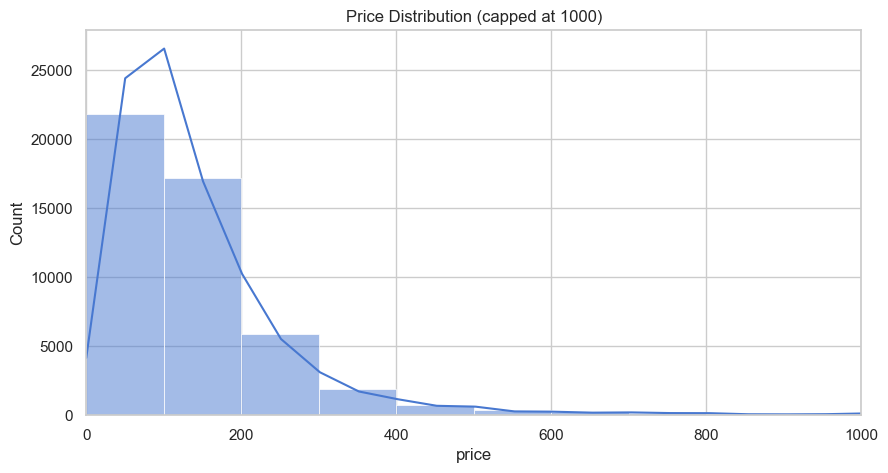

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title("Price Distribution (capped at 1000)")
plt.show()

## 📍 Listings by Neighbourhood Group  
Explore how listings are distributed across boroughs.  

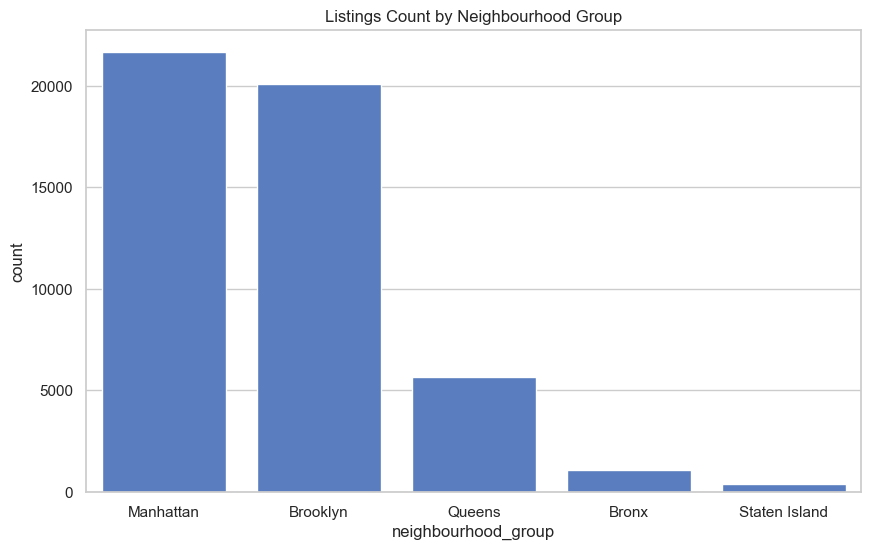

In [15]:
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title("Listings Count by Neighbourhood Group")
plt.show()

In [16]:
px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="neighbourhood_group",
    hover_name="name",
    zoom=9,
    mapbox_style="carto-positron"
)

C:\Users\hakha\AppData\Local\Temp\ipykernel_13608\1864969579.py:1: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  px.scatter_mapbox(


## 🛏️ Room Type Analysis  

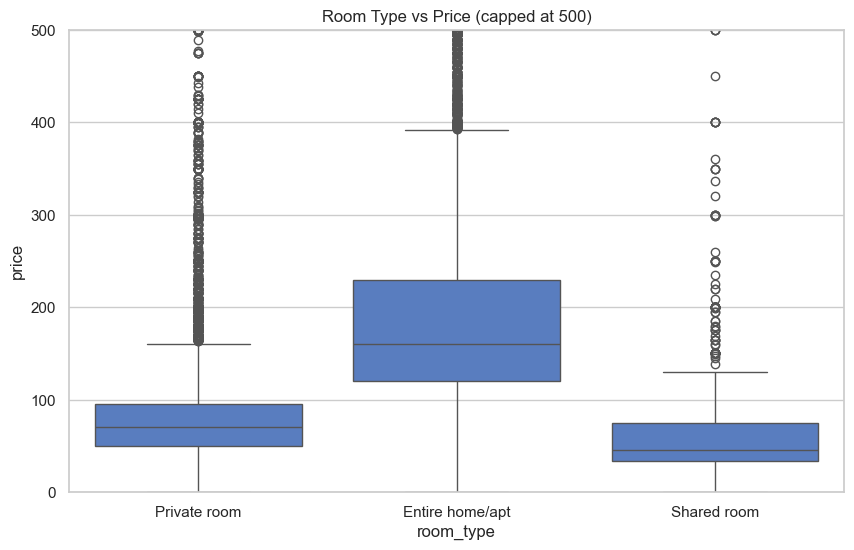

In [17]:
sns.boxplot(data=df, x='room_type', y='price')
plt.ylim(0, 500)
plt.title("Room Type vs Price (capped at 500)")
plt.show()

## 📆 Availability Trends  

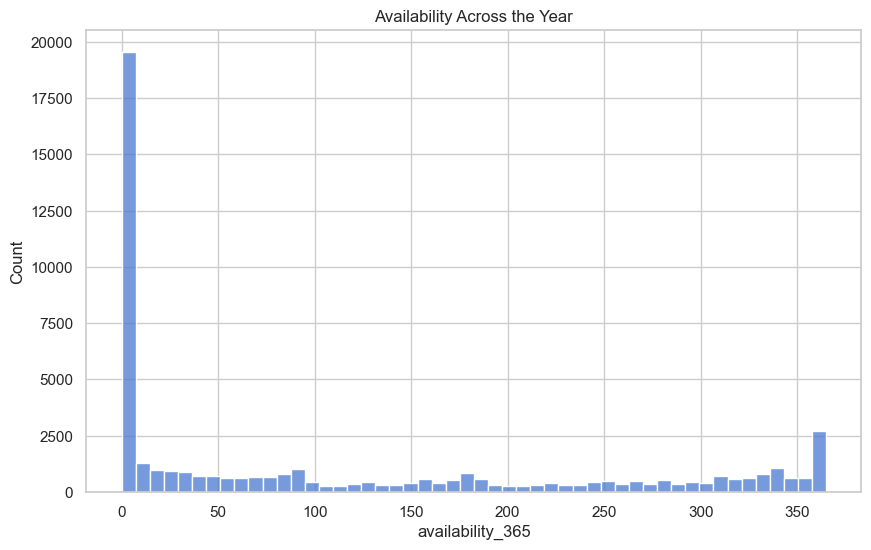

In [18]:
sns.histplot(data=df, x='availability_365', bins=50)
plt.title("Availability Across the Year")
plt.show()

## 👤 Host Analysis  
- Top 10 hosts by number of listings  

In [19]:

df['host_id'].value_counts().head(10)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64


# 📌 Conclusion  
- Most Airbnb listings are concentrated in **Manhattan and Brooklyn**.  
- Price distribution is **heavily skewed** (majority under $500).  
- Entire homes/apartments are generally priced higher than shared/private rooms.  
- Some hosts have multiple listings (professional hosts).  
- Availability varies – many listings available only part of the year.  